# Classification using Support Vector Machine (SVM)

Support Vector Machine (SVM) is a very important type of classification method and is the most complex method present in this lecture series. 

Both conceptually and in terms of implementations, **SVM relies on many advanced concepts in both mathematics and programming. However, the basic idea underlying the algorithm is actually quite simple to grasp** and for its successful use, it is probably enough to understand the geometric interpretation only.

In this section, there will be a significant amount of theory and understanding required, with little coding. Although you will not end up the lecture knowing how to implement the code yourself, like for the other algorithms presented, you should be able to use SVM and understand some of the important subtleties underlying them. 

In simple terms, **a SVM tries to divide space into regions in such a way that in each of these regions only points within the same category are present**. This division is done by looking at the training dataset. Once a test point is then provided, SVM simply finds the region a point belongs to, and assign the label corresponding to that region. 

All the "magic" of SVM is on how the partition of space is actually made, and what sort of tricks can be used when such a sharp separation between different regions is not possible.

To understand all of this, let us first have a look at a simple example, which will also help us define some of the concepts and the jargon used for describing SVMs. 

## Maximal Margin Classifier: 1D

To begin, we need to provide a few definitions and we will try to state the problem in the simplest possible way. 

We take the example of 1D input data (`X`) and a two class 1D set of output data (`y`). In other words, we have 1 single independent variable `X`, to which it corresponds a certain label `y`. `X` in this example is continuous and takes values from 0 to 10, and `y` is discrete and takes values of either `A` or `B`. 

In this 1D system, the **margin** is defined as **the halfway point between the two datapoints closest to each from either class**. In the graph below, since there is no overlap between `A` and `B`, to calculate the position of the margin we take the largest point from `A` and the smallest point from `B` and take the average between the two. 
If a new point is on the left side of the margin then it is classified as `A` and if not then it is classified as `B`. If we were to expand this into a function then a snippet of code like the one below could be used to return the predicted class of a `new_point`.

```python
    if new_point < midpoint:
        return 'A'
    else:
        return 'B'
```

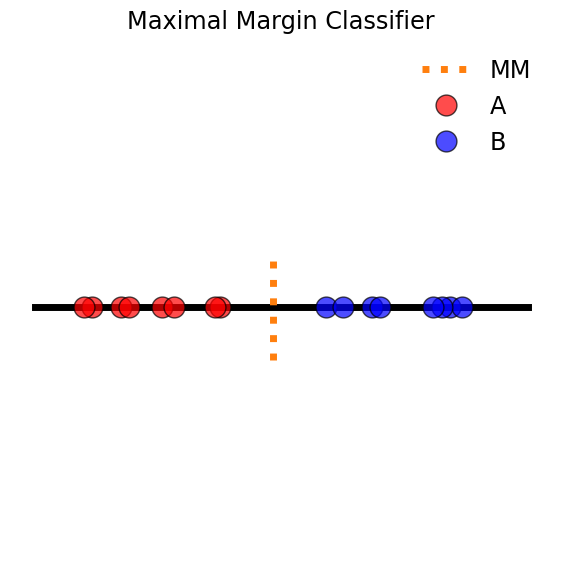

In [1]:
import matplotlib.pyplot as plt

A = [1.1, 1.3, 3.5, 2.1, 0.4, 0.2, 3.4, 2.4]
B = [9.1, 7.2, 6.1, 7.4, 6.5, 9.4, 8.9, 8.7]

fig, ax = plt.subplots(figsize=(7, 7))
ax.axis('off')
ax.set_ylim([-0.5, 0.5])

# create number line
ax.plot([-1, 11], [0, 0], 'k-', linewidth=5)

# create midpoint
midpoint = (float(max(A)) + float(min(B))) / 2.0
ax.plot([midpoint, midpoint], [-0.1, 0.1], ':', color='tab:orange', linewidth=5, label='MM')

# plot A and B
ax.plot(A, [0] * len(A), 'ro', markersize=15, markeredgecolor='k', alpha=0.7, label='A')
ax.plot(B, [0] * len(B), 'bo', markersize=15, markeredgecolor='k', alpha=0.7, label='B')

# make title
ax.set_title('Maximal Margin Classifier', fontsize='xx-large')

# make legend
ax.legend(frameon=False, fontsize='xx-large')

None

## Maximal Margin Classifier: Multi-dimensional case

When the number of independent variables is larger than one, we can see our point as being described by a N-dimensional vector rather than a point. In this case, the margin is not a point itself but an hyper-plane. **We call this plane a linear classifier**.

You should notice that if the data are perfectly separable, there are many hyperplanes that might classify the data (in the same way that there were many points on a line that could have separated the data in the 1D case. 

One reasonable choice to decide which plane to use as the boundary between two categories is to take the hyperplane for which there is the largest separation between the two classes. More precisely, we choose the hyperplane in such a way that the sum of the distances between the nearest datapoints in each of the two classes is maximized. You can see that this is equivalent to the same procedure we used above, since the midpoint between the two closest datapoints in 1D is exactly the point that maximises this distance!

This choice of plane might seem a little arbitrary. After all, if this plane exists, there actually infinite other hyper-planes that can perfectly classify the *training* dataset. Without going into the mathematical details, however, **the maximum-margin hyper-plane can be proven to represent the best choice because it provides the lowest generalization error of the classifier when used on points outside the training dataset**. 

If you wish to read more, you can find all details (and a lot more about the foundation of statistical methods for classification!) [here](https://web.stanford.edu/~hastie/Papers/ESLII.pdf#page=153)

## Support Vector Classifier

We have seen a simple example where the dataset is well separated. However, it is rare for data to contain no overlaps, and typically in systems where no overlaps exist, this is already known <i>a priori</i> and is trivial to discuss. This occur, for example, where there is some clear underlying reason for the data to be perfectly separated. 

What happens when datas contain an overlap, such that no (hyper-)plane can separate them exactly? Before we try to solve this issue, it is useful to introduce a new term called **support vector**. 

Consider the vector from the origin to any point in the dataset. **The support vectors are the subset of the vectors *in the training database* that are incorrectly classified by the (hyper-)plane**. A Support Vector Machine, our classifier, is constructed by **minimising the distance between support vectors and the classification hyper-plane**. 

This is not easy to understand intuitively, and the graph below presents an schematic of what a support vector actually looks like, as well as the separating (hyper-)plane (a line in this 2D example).

Understanding the code to create the diagram is not necessary - it exists purely as a reference for advanced users. Instead **focus on examining the figure at the end of the code to understand qualitatively what a support vector is**

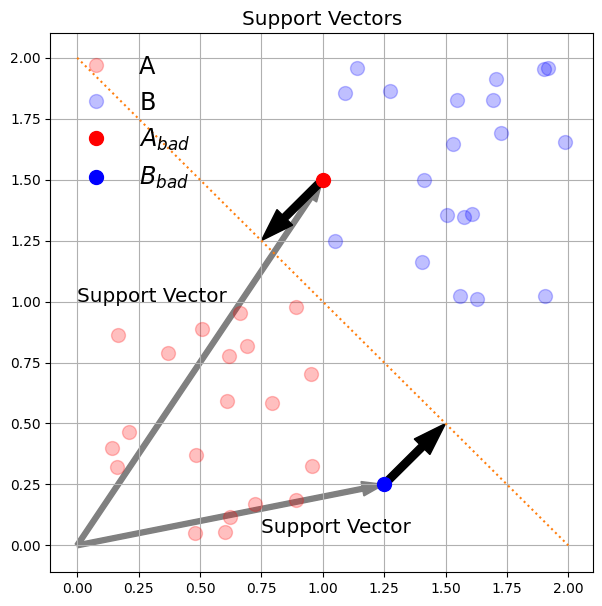

In [2]:
import numpy as np

# Create data without any support vectors
fig, ax = plt.subplots(figsize=(7, 7))

# generate random data
good_data_A = np.random.random((20, 2))
good_data_B = np.random.random((20, 2)) + 1.0

# create endpoints of classifier line
classifier = np.array([
    [0, 2],
    [2, 0]
])

# plot classifier line
ax.plot(classifier[:, 0], classifier[:, 1], ':', color='tab:orange')

# plot the data respectively for each set
ax.plot(good_data_A[:, 0], good_data_A[:, 1], 'ro', alpha=0.25, label='A', markersize=10)
ax.plot(good_data_B[:, 0], good_data_B[:, 1], 'bo', alpha=0.25, label='B', markersize=10)

# Add 1 support vector example
bad_data_A = np.array([1.0, 1.5])
ax.plot(bad_data_A[0], bad_data_A[1], 'ro', label=r"$A_{bad}$", markersize=10)

bad_data_B = np.array([1.25, 0.25])
ax.plot(bad_data_B[0], bad_data_B[1], 'bo', label=r"$B_{bad}$", markersize=10)

## draw vectors

# vector to real point A
ax.arrow(0, 0, bad_data_A[0], bad_data_A[1], width=0.02, length_includes_head=True, color='grey')

# vector to classifier for point A
ax.arrow(0, 0, 1.25, 0.25, width=0.02, length_includes_head=True, color='grey')

# support vectors
ax.arrow(bad_data_A[0], bad_data_A[1], -0.25, -0.25, width=0.03, length_includes_head=True, color='black')
ax.arrow(bad_data_B[0], bad_data_B[1], 0.25, 0.25, width=0.03, length_includes_head=True, color='black')

# add label and annotation
from matplotlib import patches

# add curved label arrow for red point
#label_arrow = patches.FancyArrowPatch(
#    (1.5, 0.5),
#    (1.05, 1.2), 
#    connectionstyle="arc3,rad=.5",
#    arrowstyle="Simple, tail_width=1.0, head_width=5, head_length=8",
#    color='black',
#)
#ax.add_patch(label_arrow)

# add curved label arrow for blue point
#label_arrow = patches.FancyArrowPatch(
#    (1.5, 0.5),
#    (1.3, 0.4),
#    connectionstyle="arc3,rad=-.5",
#    arrowstyle="Simple, tail_width=1.0, head_width=5, head_length=8",
#    color='black',
#)
#ax.add_patch(label_arrow)

# add label
ax.text(.75, 0.05, 'Support Vector', fontsize='x-large')
ax.text(.0, 1.0, 'Support Vector', fontsize='x-large')

# add legend    
ax.legend(fontsize='xx-large', facecolor='white', loc=2, frameon=False)

# add title
ax.set_title('Support Vectors',fontsize='x-large')
ax.grid('on')
None

**Note:** Note that because in its actual implementation finding the maximum margin classifier or the support vector classifier requires using very similar algorithm, the term Support Vector Machine - although somewhat abused - encompasses both. A (standard) SVM will thus find the maximum margin classifier, if possible, or the support vector classifier otherwise.

## SVM and "The Kernel Trick"

When data cannot be separated exactly by an hyper-plane, one solution is to find the hyper-plane that minimise the distance of the support errors, as seen above. However, there is another more sophisticated technique that can be used, the so-called **Kernel trick**. 

The mathematics behind it is quite complex and again we will just simply give an idea of how it works, without providing any exact treatment. The general idea is that points that are not separable in a certain space might be separable in a space of higher dimension.

Let us make an example to clarify these concepts by looking at the graph below:

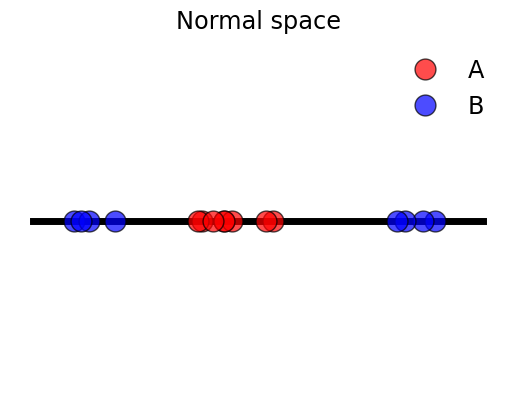

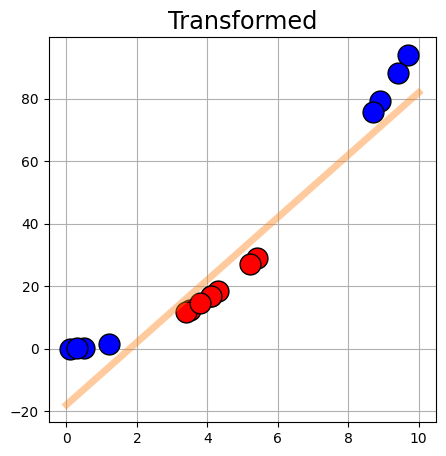

In [3]:
A = [4.1, 4.3, 3.5, 4.1, 5.4, 5.2, 3.4, 3.8]
B = [0.1, 0.5, 1.2, 0.3, 9.7, 9.4, 8.9, 8.7]

fig, ax = plt.subplots()
ax.axis('off')

# create number line
ax.plot([-1, 11], [0, 0], 'k-', linewidth=5)

# plot A and B
ax.plot(A, [0] * len(A), 'ro', markersize=15, markeredgecolor='k', alpha=0.7, label='A')
ax.plot(B, [0] * len(B), 'bo', markersize=15, markeredgecolor='k', alpha=0.7, label='B')

# make title
ax.set_title('Normal space', fontsize='xx-large')

# make legend
ax.legend(frameon=False, fontsize='xx-large')

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(A, [i ** 2 for i in A], 'ro', markersize=15, markeredgecolor='k')
ax.plot(B, [i ** 2 for i in B], 'bo', markersize=15, markeredgecolor='k')

# plot classifier
ax.set_title('Transformed', fontsize='xx-large')
ax.plot([0, 10], [-18, 82], '-', color='tab:orange', linewidth=5, label='MM', alpha=0.4)
ax.grid('on')
None

#print(np.array(A) ** 2)
#print(np.array(B) ** 2)

As you can see, there is no single line that, in the original space 1D space, can separate the blue and red dots. However, we can increase their dimensionality by replacing each point, described by a single coordinate $x'$ in 1D, with another point in a higher dimension, where the X and Y values are a (non-linear) function of x'. In the example above, the definition of the transformation is given by: 

\begin{equation}
x' \rightarrow (x', x'^2)
\end{equation}

where we have used something known as the <b>polynomial kernel function</b> with order 2.

As you can see, in this transformed, higher dimensional space, the points become separable using a line, which can be found using a standard SVM! In fact, it can be proven that using enough dimensions, there is always a way to separate two classes. 

Although this seems appealing (it provides a way to find a perfect classifier!) the reality is that what is a  perfect classifier when trained on the training data might actually perform very badly when used for predictions, as it could be seen by checking its metric on a test set. In a certain way, it is the equivalent to over-fitting a function on the training set.

`scikit-learn` offers a wide range of valid kernels that have programmed to maximise computational efficiency, and users are encouraged to use these models rather than to construct one for themselves. These kernels are:

- Linear
- Polynomial (raise to the power `d`)
- Radial Basis Function (related to the exponetial function)
- Sigmoid Function (uses tanh)

> A still rather simple treatment but with a few more details of the Kernel trick can be found [here](https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f#:~:text=The%20%E2%80%9Ctrick%E2%80%9D%20is%20that%20kernel,the%20data%20by%20these%20transformed). A good discussion, but a little more complex, can be found instead [here](https://stats.stackexchange.com/questions/168051/kernel-svm-i-want-an-intuitive-understanding-of-mapping-to-a-higher-dimensional), where you can also find further useful references!

## Practical implementation

As usual, sci-kit learn streamlines most of what you need to do to deploy your classification algorithm. Similar to the previous algorithm, using an SVM in sci-kit is as easy as:

`
from sklearn import svm
X = List of independent variables describing the data points in the training set
y = List of values for the category each of the points above corresponds to
classifier = svm.SVC() / or svm.LinearSVC(), if we do not want to use a standard SVM with no kernel
classifier.fit(X, y)
`

After being fitted, the model can then be used to predict new values with a simple call:

`
classifier.predict([[2., 2.]])
`

you will experiment with this in the exercises

## Food for Thought: Multi-Class classification with binary classifiers

We have (quickly) seen how an SVM can be applied to the problem of classifying objects that can have one of two different labels (classes/categories). 

One question that you should ask is the following: Can we easily expand it to multi-category classification? The answer is a resounding yes. It can be done in different ways but typically one would use one of the following two approaches we are going to describe.

In practice, the idea is to split the multi-category classification dataset into multiple binary classification problems and fit a binary classification model on each, using either the **One-vs-Rest** or the **One-vs-One** strategy.

In the **One-vs-Rest** (or **one-vs-all**) approach, one fits $N$ classifiers, one per existing class. It is the most commonly used strategy for multiclass classification and is a good default choice. Within this strategy, a classifier tells you whether a point belongs to that class, or not. Thus, when multiple classes are present, one can run each classifier on the data until the correct label is found.  
In addition to its computational efficiency (because only $N$ classifiers are needed), the other advantage of this approach is its interpretability. Because each class is represented by one and one classifier only, it is possible to gain knowledge about it by inspecting the corresponding classifier. 

Example: given a multi-class classification problem with 3 classes ‘A,’ ‘B,’ and ‘C‘. This could be divided into three binary classification datasets as follows:<br>
Binary Classification Problem 1: A vs (B or C)<br>
Binary Classification Problem 2: B vs (A or C)<br>
(if it is not in A or B, it must then be in C)

**One-Vs-One** (OvO for short) is another widely used method for using binary classification algorithms for multi-class classification. Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into one dataset for each class versus every other class.<br>
Considering the previous problem, this approach would train $N(N-1)/2$ classifiers solving the problem:<br>
Binary Classification Problem 1: A vs B<br>
Binary Classification Problem 2: A vs C<br>
Binary Classification Problem 3: B vs C<br>

This is significantly more classifiers (it scales as $N^2$ instead of $N$!) than the one-vs-rest strategy described above. Each of these binary classifiers may predict one class label for the same point, and the label with the largest number of votes is the one chosen as the final result.